# Why use Softmax?

Difference between the reverse sigmoid and tanh functions for transforming function outputs into probability-esque quantities.

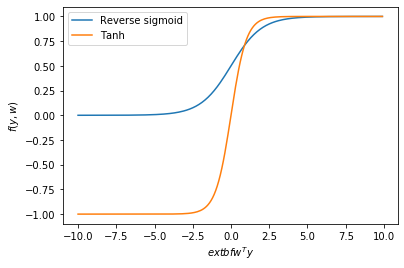

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10,10,.1)
def reverse_sigmoid(x):
    return 1 / (1 + np.exp(-x))

plt.plot(x, reverse_sigmoid(x), label = "Reverse sigmoid")
plt.plot(x, np.tanh(x), label = "Tanh")
plt.xlabel("$\textbf{w^Ty}$")
plt.ylabel("$f(y,w)$")
plt.legend()

Difference between the normal standardization, softmax, and hardmax functions. Softmax function is a generalization of the reverse sigmoid function. Below is the case for two classes, as well as more than two. The bottom makes use of element-wise division and exponentiation

\begin{gather}
f(\textbf{w},\textbf{y})=\frac{1}{1+e^{-\textbf{w}^\top\textbf{y}}} \\\\
f(\textbf{W},\textbf{y})=\frac{\exp(\textbf{Wy})}{\textbf{e}^\top\exp(\textbf{Wy})}
\end{gather}

In [47]:
def standard(x):
    return x / np.sum(x)

def softmax(x):
    return np.exp(x) / sum(np.exp(x))

def hardmax(x):
    a = np.zeros(len(x))
    a[np.argmax(x)] = 1
    return a

In [48]:
test = np.array([1, 2])
test2 = np.array([100, 101])
test3 = np.array([3, 6])

print("Baseline: Output of functions for {}".format(test))
print("Standard normalization: {}".format(standard(test)))
print("Softmax: {}".format(softmax(test)))
print("Hardmax: {}".format(hardmax(test)))

print("\nSame Difference: Output of functions for {}".format(test2))
print("Standard normalization: {}".format(standard(test2)))
print("Softmax: {}".format(softmax(test2)))
print("Hardmax: {}".format(hardmax(test2)))

print("\nSame Proportion: Output of functions for {}".format(test3))
print("Standard normalization: {}".format(standard(test3)))
print("Softmax: {}".format(softmax(test3)))
print("Hardmax: {}".format(hardmax(test3)))

Baseline: Output of functions for [1 2]
Standard normalization: [0.33333333 0.66666667]
Softmax: [0.26894142 0.73105858]
Hardmax: [0. 1.]

Same Difference: Output of functions for [100 101]
Standard normalization: [0.49751244 0.50248756]
Softmax: [0.26894142 0.73105858]
Hardmax: [0. 1.]

Same Proportion: Output of functions for [3 6]
Standard normalization: [0.33333333 0.66666667]
Softmax: [0.04742587 0.95257413]
Hardmax: [0. 1.]


Standard normalisation values are the same if the proportion between the original values are maintained.
Softmax values are the same for vectors where all the absolute differences between the original values are maintained. Hardmax values are the same as long as the maximum index remains unchanged, though it is not differentiable.

Think in the context of neural networks. Say my predictive function $f$ outputs a score of 1 for class A and 2 for class B. Let's say, based on the way I scaled the output of this function, 1 and 2 are quite small values. Based on the probability distribution generated by standard normalization, class A would be predicted with probability 0.33 and class B with probability 0.67. By softmax, it would be 0.26 for class A and 0.73 for class B. Somewhat similar.

Now let's say the function outputs 100 for class A and 101 for class B. So in our scale, 100 and 101 are really large and strong values. However, the absolute difference. Now the ratio of class B to class A changed from 2 to close to 1. But the absolute difference remains the same, at 1. Turns out the softmax function output remains the same but the normalization becomes less certain than before. I think it's debatable which one of these functions gives the desirable property. 

The key difference is when the ratio is constant, but the absolute difference in scores changes. At higher values, the softmax function becomes much more certain of the higher value and much closer to approximating the hardmax function than standard normalization. For scores 3 and 6, softmax leaps for 0.73 to 0.95 for class B. I think in most applications this is desirable. The proportion between scores is not what makes me confident about a classification, but the absolute values should play a key role in that decision as well. 1 and 2 does not have as much confidence as 100 to 200, even though standard normalisation would suggest otherwise. 